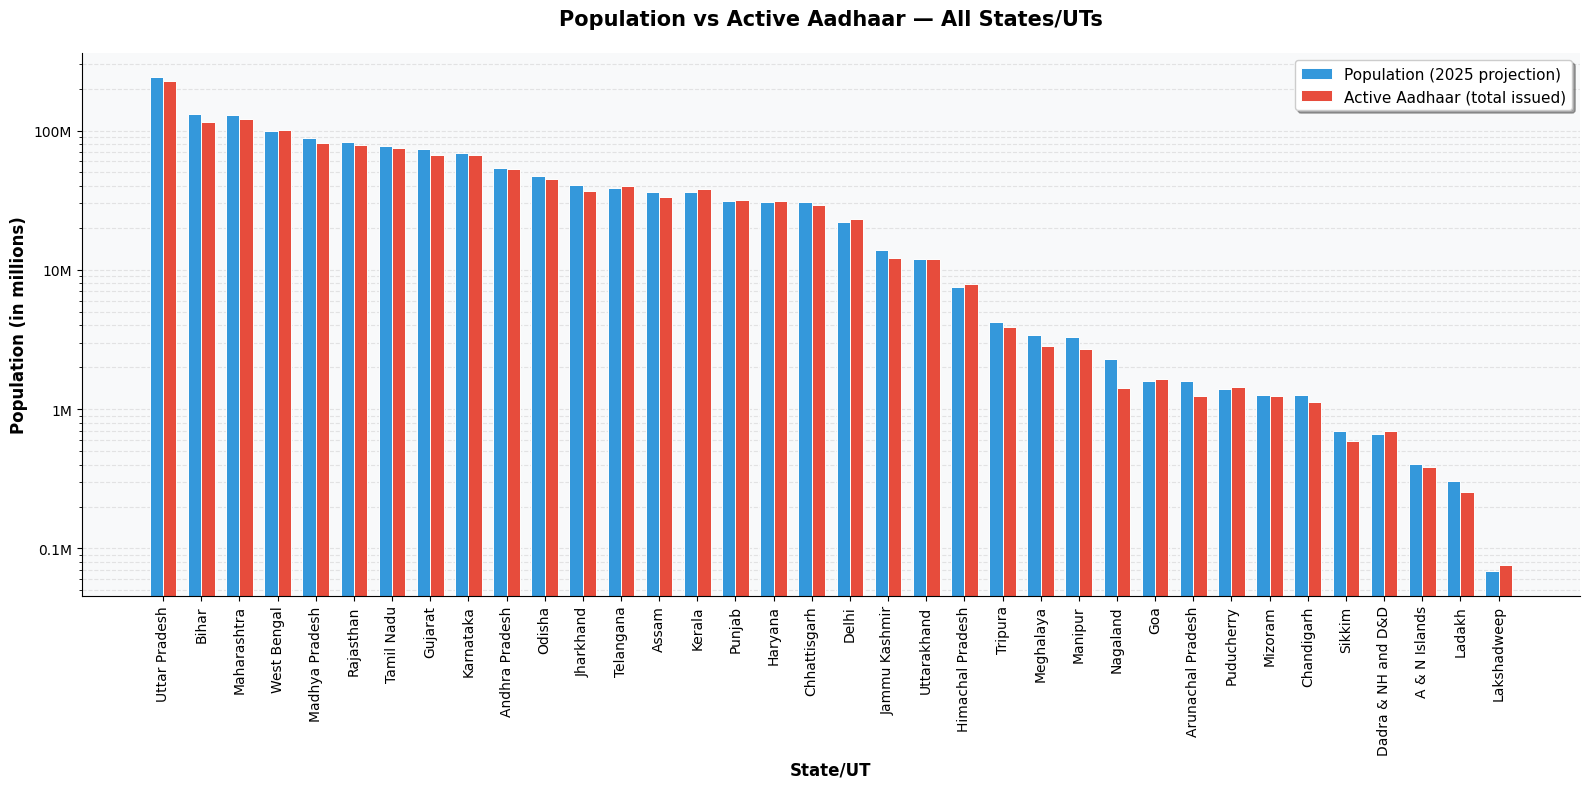


SUMMARY STATISTICS
Total States/UTs: 36
Total Population: 1,412,225,700 (1412.2M)
Total Active Aadhaar: 1,342,558,318 (1342.6M)
Overall Penetration: 95.07%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


raw = pd.read_excel("../sql/data/AadhaarSaturationReport.xlsx", header=None)

df = raw.iloc[5:41].copy()
df.columns = ["sno", "state", "population", "aadhaar_assigned", "penetration_ratio"]


df["population"] = (
    df["population"]
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)

df["aadhaar_assigned"] = (
    df["aadhaar_assigned"]
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)


df = df.sort_values("population", ascending=False)


df["state"] = df["state"].str.replace(
    "Dadra & Nagar Haveli and Daman & Diu",
    "Dadra & NH and D&D",
    regex=False
)


df["population_millions"] = df["population"] / 1_000_000
df["aadhaar_millions"] = df["aadhaar_assigned"] / 1_000_000


x = np.arange(len(df))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 8))

bars1 = ax.bar(
    x - width/2,
    df["population_millions"],
    width,
    color="#3498db",
    label="Population (2025 projection)",
    edgecolor="white",
    linewidth=0.7
)

bars2 = ax.bar(
    x + width/2,
    df["aadhaar_millions"],
    width,
    color="#e74c3c",
    label="Active Aadhaar (total issued)",
    edgecolor="white",
    linewidth=0.7
)


ax.set_xticks(x)
ax.set_xticklabels(df["state"], rotation=90, fontsize=10)
ax.set_ylabel("Population (in millions)", fontsize=12, fontweight="bold")
ax.set_xlabel("State/UT", fontsize=12, fontweight="bold")
ax.set_title(
    "Population vs Active Aadhaar — All States/UTs",
    fontsize=15,
    fontweight="bold",
    pad=20
)


ax.grid(axis="y", linestyle="--", alpha=0.3, zorder=0, which="both")
ax.set_axisbelow(True)
ax.set_yscale("log")


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


ax.legend(
    loc="upper right",
    fontsize=11,
    frameon=True,
    shadow=True,
    fancybox=True
)


from matplotlib.ticker import FuncFormatter

def format_millions(y, pos):
    if y >= 1:
        return f"{y:.0f}M"
    elif y >= 0.1:
        return f"{y:.1f}M"
    else:
        return f"{y:.2f}M"

ax.yaxis.set_major_formatter(FuncFormatter(format_millions))


ax.set_facecolor("#f8f9fa")
fig.patch.set_facecolor("white")

plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Total States/UTs: {len(df)}")
print(f"Total Population: {df['population'].sum():,.0f} ({df['population_millions'].sum():.1f}M)")
print(f"Total Active Aadhaar: {df['aadhaar_assigned'].sum():,.0f} ({df['aadhaar_millions'].sum():.1f}M)")
print(f"Overall Penetration: {(df['aadhaar_assigned'].sum()/df['population'].sum()*100):.2f}%")
print("="*60)
